In [ ]:
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import re
import requests
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

In [ ]:

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = ""

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="H_3TCox62rQ",
    maxResults=100
)
response = request.execute()

for item in response['items']:
    print(item['snippet']['topLevelComment']['snippet']['textDisplay'])


welcome back 2 the white house where u belong trump!!! we did it again!!!
Watch important news .  Is USA now gives job. For indian / pak <br>Trup reality recently Video <br><a href="https://www.youtube.com/watch?v=F9Qyxls0oZE">https://youtu.be/F9Qyxls0oZE?si=Rh5NktUgPuvbR7VX</a>
I like Donald, I wish we won our last election too. from a Turk 🇹🇷.
We as a country elected a felon.  Why are we back?  So if Charles Manson runs in 2028 would you vote for him?  WOW.  The only reason he ran again was to avoid being in prison you Hitler cult people.
I am not afraid to admit I have watched this speech a few times now...and I am honestly still so moved by the heart, soul and determination of this man...I admit back in 2016 I was very whatever on Donald Trump (though I STILL didn&#39;t want Hilary to win because well I disliked her way more then I ever did Trump lol) and I often joined in with my friends mocking him...fast forward to now and I really got to see the heart he has for the people, the

In [ ]:
comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

df.head(10)


,author,published_at,updated_at,like_count,text
0,@popsingerstar,2024-11-18T05:25:30Z,2024-11-18T05:25:30Z,0,welcome back 2 the white house where u belong ...
1,@universalmathematics1146,2024-11-17T16:22:58Z,2024-11-17T16:22:58Z,0,Watch important news . Is USA now gives job. ...
2,@Roxy0.1,2024-11-17T16:14:25Z,2024-11-17T16:14:25Z,1,"I like Donald, I wish we won our last election..."
3,@jbetch10,2024-11-17T04:14:49Z,2024-11-17T04:14:49Z,0,We as a country elected a felon. Why are we b...
4,@Avalon64,2024-11-17T02:58:53Z,2024-11-17T02:58:53Z,0,I am not afraid to admit I have watched this s...
5,@Domitsu91,2024-11-15T22:24:54Z,2024-11-15T22:24:54Z,0,"MAGA 4 LYF <a href=""http://www.youtube.com/res..."
6,@Domitsu91,2024-11-15T14:11:29Z,2024-11-15T14:12:28Z,2,"I PRAYED FOR THIS MAN, I WAS SO HAPPY WHEN HE ..."
7,@spideronawhiteflag,2024-11-15T08:07:10Z,2024-11-15T08:07:10Z,0,Elon shoukd staty away from Mars<br>he&#39;s g...
8,@AbdulAhad-k5j,2024-11-15T04:17:49Z,2024-11-15T04:17:49Z,0,hi
9,@Dalmatinac1989,2024-11-14T16:46:25Z,2024-11-14T16:46:25Z,0,Airship AI will be huge for patrolling the border


In [ ]:
df.to_csv('emotion_trump_victory_data.csv', index=False)


In [ ]:
df=df.drop(['author','published_at','updated_at','like_count'],axis=1)

In [ ]:
df

,text
0,welcome back 2 the white house where u belong ...
1,Watch important news . Is USA now gives job. ...
2,"I like Donald, I wish we won our last election..."
3,We as a country elected a felon. Why are we b...
4,I am not afraid to admit I have watched this s...
...,...
95,I wanna visit USA once it&#39;s a dream city ❤
96,Try to argue with trump that if u hate crime k...
97,Hell yeah Brothers. Communism here we come. J....
98,"We made history. To my fellow Americans, I lov..."


## Textblob

In [ ]:
#  emotion analysis for df

!pip install textblob

from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  elif analysis.sentiment.polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'





In [ ]:
df['sentiment'] = df['text'].apply(get_sentiment)

print(df.head(10))



                                                text sentiment
0  welcome back 2 the white house where u belong ...  Positive
1  Watch important news .  Is USA now gives job. ...  Positive
2  I like Donald, I wish we won our last election...   Neutral
3  We as a country elected a felon.  Why are we b...  Positive
4  I am not afraid to admit I have watched this s...  Positive
5  MAGA 4 LYF <a href="http://www.youtube.com/res...   Neutral
6  I PRAYED FOR THIS MAN, I WAS SO HAPPY WHEN HE ...  Positive
7  Elon shoukd staty away from Mars<br>he&#39;s g...  Negative
8                                                 hi   Neutral
9  Airship AI will be huge for patrolling the border  Positive


In [ ]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
Positive,43
Neutral,38
Negative,19


In [ ]:
df.to_csv('emotion_trump_victory_data.csv', index=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       100 non-null    object
 1   sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


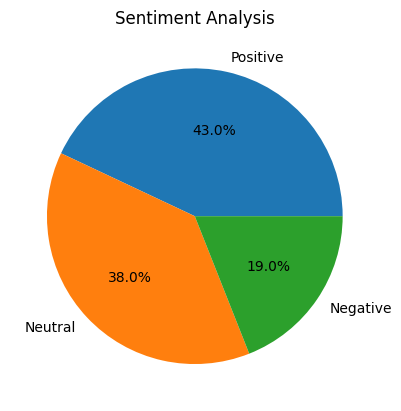

In [ ]:
plt.pie(sentiment_counts, labels=sentiment_counts.index,autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
!pip install  transformers -q

# Sam lowe Roberta model

In [ ]:
emotionModel = pipeline('text-classification',model='SamLowe/roberta-base-go_emotions')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
def get_emotion(text):
    return(emotionModel(text)[0]['label'])

In [ ]:
df['RoBertaEmotions'] = df['text'].apply(lambda x:get_emotion (x[:514]))


In [ ]:
df

,text,sentiment,RoBertaEmotions
0,welcome back 2 the white house where u belong ...,Positive,excitement
1,Watch important news . Is USA now gives job. ...,Positive,neutral
2,"I like Donald, I wish we won our last election...",Neutral,desire
3,We as a country elected a felon. Why are we b...,Positive,curiosity
4,I am not afraid to admit I have watched this s...,Positive,amusement
...,...,...,...
95,I wanna visit USA once it&#39;s a dream city ❤,Neutral,desire
96,Try to argue with trump that if u hate crime k...,Negative,neutral
97,Hell yeah Brothers. Communism here we come. J....,Positive,neutral
98,"We made history. To my fellow Americans, I lov...",Positive,love


In [ ]:
roberta_emotion_counts = df['RoBertaEmotions'].value_counts()
roberta_emotion_counts

,count
RoBertaEmotions,
neutral,39
admiration,7
anger,7
annoyance,5
curiosity,5
gratitude,5
love,5
caring,4
joy,4


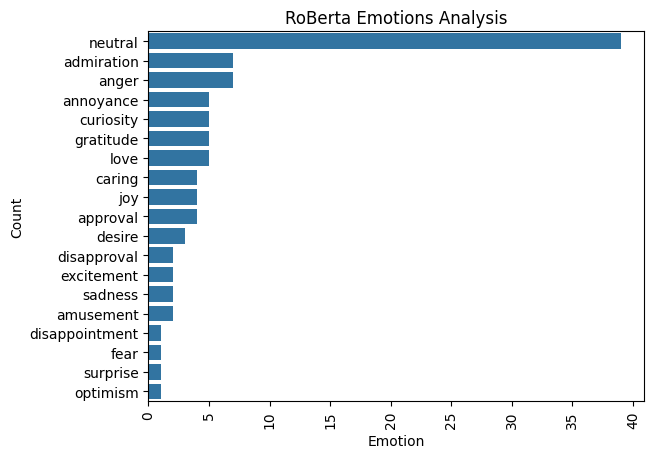

In [ ]:
sns.barplot(y=roberta_emotion_counts.index, x=roberta_emotion_counts.values)
plt.title('RoBerta Emotions Analysis')
plt.xlabel('Emotion')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df)


tfidf_matrix.todense()

matrix([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [ ]:
# Clustering using K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)
kmeans.fit(tfidf_matrix)


order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])




Cluster 0:
 sentiment
 text
 robertaemotions
Cluster 1:
 robertaemotions
 text
 sentiment
Cluster 2:
 text
 sentiment
 robertaemotions


In [ ]:
#  Dimensionality Reduction using PCA (for 2D visualization)
pca = PCA(n_components=2, random_state=42)
reduced_data_2d = pca.fit_transform(tfidf_matrix.toarray())


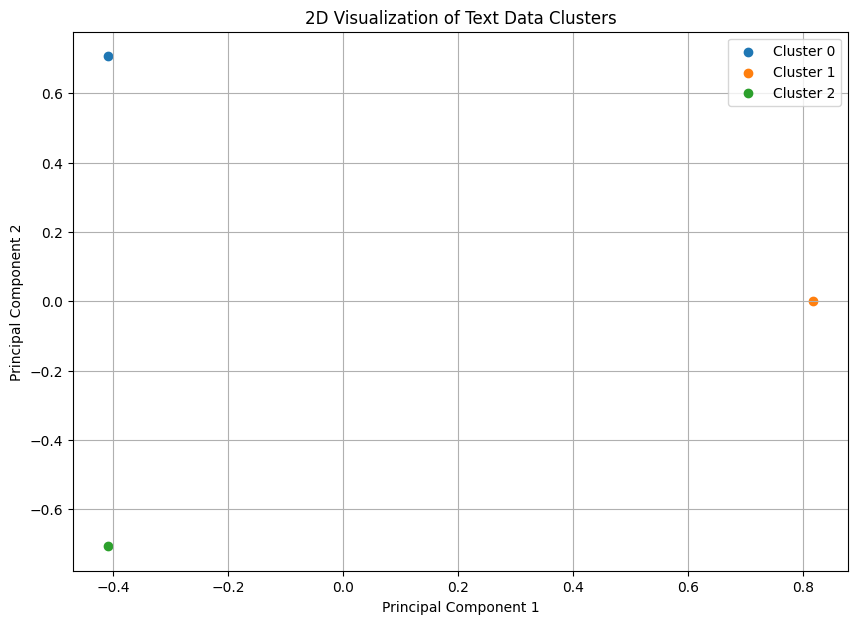

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#  Visualization
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_points = reduced_data_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("2D Visualization of Text Data Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(tfidf_matrix.toarray())
df_3d = pd.DataFrame(data=principal_components_3d, columns=['principal_component_1', 'principal_component_2', 'principal_component_3'])
df_3d['cluster'] = cluster_labels

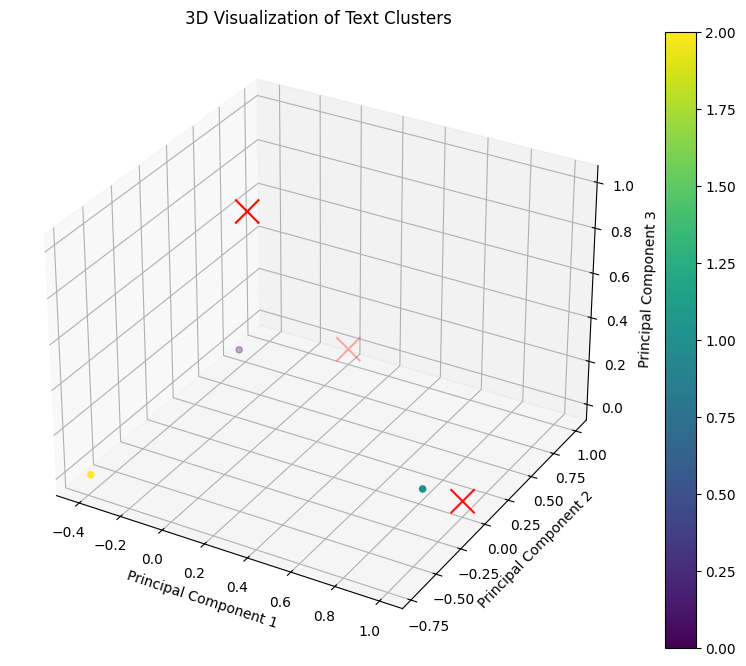

In [ ]:
#plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_3d['principal_component_1'], df_3d['principal_component_2'], df_3d['principal_component_3'], c=df_3d['cluster'], cmap='viridis', marker='o')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='x')  # Plot cluster centers
ax.set_title('3D Visualization of Text Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter)
plt.show()
